In [70]:
import pandas as pd
import numpy as np
import math 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import time

# Question 1

In [7]:
loandata = pd.read_csv('loandata.csv') 
loandata

field  selectiveCollege     sex Default  loanAmount  graduationYear
0           STEM                 0    Male      No       22907            2005
1     HUMANITIES                 0    Male     Yes       60087            2010
2     HUMANITIES                 0  Female      No       33149            2011
3           STEM                 1  Female      No       33342            2007
4       BUSINESS                 0    Male     Yes       55834            2013
...          ...               ...     ...     ...         ...             ...
1995    BUSINESS                 0  Female      No       34862            2006
1996  HUMANITIES                 0  Female     Yes       51527            2008
1997        STEM                 0    Male      No       63594            2012
1998    BUSINESS                 1  Female      No       54822            2006
1999    BUSINESS                 0    Male      No       70776            2009

[2000 rows x 6 columns]

# Question 2-3

In [26]:
loandata_shuffled = shuffle(loandata)

training_data = loandata_shuffled[0:1000]
validation_data = loandata_shuffled[1000:1500]
test_data = loandata_shuffled[1500:2000]

training_data_x = training_data.drop(columns = ['Default'])
training_data_x_dummy = pd.get_dummies(training_data_x)
training_data_y = training_data.Default

validation_data_x = validation_data.drop(columns = ['Default'])
validation_data_x_dummy = pd.get_dummies(validation_data_x)
validation_data_y = validation_data.Default

test_data_x = test_data.drop(columns = ['Default'])
test_data_x_dummy = pd.get_dummies(test_data_x)
test_data_y = test_data.Default

# Question 4

In [30]:
# ?

# Question 5 

In [44]:
clf = DecisionTreeClassifier() # 
clf.fit(training_data_x_dummy,training_data_y)
max_depth = clf.get_depth()
best_depth = 0
best_score = 0
for depth in range(1,max_depth+1):
    clf = DecisionTreeClassifier(max_depth=depth) 
    clf.fit(training_data_x_dummy,training_data_y)
    if best_score < clf.score(validation_data_x_dummy,validation_data_y):
        best_score = clf.score(validation_data_x_dummy,validation_data_y)
        best_depth = depth
print('The best maximum depth is',best_depth,', while the best score is',best_score)
clf = DecisionTreeClassifier(max_depth=best_depth)
clf.fit(training_data_x_dummy,training_data_y)
score = clf.score(test_data_x_dummy,test_data_y)
print('The accuracy rate of using this classifier to predict test data is',score)

The best maximum depth is 3 , while the best score is 0.88
The accuracy rate of using this classifier to predict test data is 0.856


# Question 6

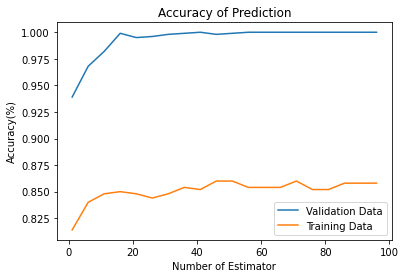

In [72]:
estimator_list = np.arange(1,100, 5).tolist()
scores_list_training = []
scores_list_validation = []
training_time = []
for k in estimator_list:
    clf = RandomForestClassifier(n_estimators=k)
    start = time.time()
    clf.fit(training_data_x_dummy, training_data_y)
    end = time.time()
    scores_list_training.append(clf.score(training_data_x_dummy,training_data_y))
    scores_list_validation.append(clf.score(validation_data_x_dummy,validation_data_y))
    training_time.append(end-start)
scores_list_df = pd.DataFrame(data=estimator_list,columns=['Number of Estimator'])
scores_list_df['Score of training data'] = scores_list_training
scores_list_df['Score of validation data'] = scores_list_validation
scores_list_df['Training time'] = training_time
plt.plot(scores_list_df['Number of Estimator'], scores_list_df['Score of training data'], label = "Validation Data")
plt.plot(scores_list_df['Number of Estimator'], scores_list_df['Score of validation data'], label = "Training Data")
plt.title('Accuracy of Prediction')
plt.xlabel('Number of Estimator')
plt.ylabel('Accuracy(%)')
plt.legend()

# Question 7

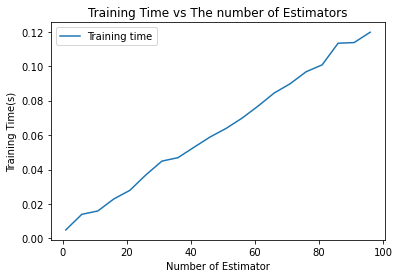

In [73]:
plt.plot(scores_list_df['Number of Estimator'], scores_list_df['Training time'], label = "Training time")
plt.title('Training Time vs The number of Estimators')
plt.xlabel('Number of Estimator')
plt.ylabel('Training Time(s)')
plt.legend()